In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [3]:
#ip adreslerini unique integer degerlerine cevirmek icin

def convert_ip(ip):
    ip = ip.strip().split('.')
    convert = []
    total = 0.0
    for each in ip:
        a = int(each)
        convert.append(a)
    for i in range(len(convert)):
        total += convert[i]*pow(64, len(convert)-i)
    return total

In [4]:
data = pd.read_csv("IoT Network Intrusion Dataset.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [6]:
data['Label'].head()

0    Anomaly
1    Anomaly
2    Anomaly
3    Anomaly
4    Anomaly
Name: Label, dtype: object

In [7]:
data['Label'].value_counts()

Anomaly    585710
Normal      40073
Name: Label, dtype: int64

In [8]:
data['Cat'].value_counts()

Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: Cat, dtype: int64

In [9]:
data['Sub_Cat'].value_counts()

Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: Sub_Cat, dtype: int64

In [10]:
data['Dst_IP'].value_counts()

192.168.0.13       164532
192.168.0.16       143150
210.89.164.90      131170
192.168.0.24        85813
222.239.240.107     11240
                    ...  
0.40.121.31             1
222.184.51.143          1
222.100.196.201         1
222.166.100.56          1
222.200.112.240         1
Name: Dst_IP, Length: 478, dtype: int64

In [11]:
data['Flow_ID'].value_counts()

192.168.0.13-192.168.0.16-56361-10101-17    51852
192.168.0.24-104.118.134.215-43238-443-6    46092
192.168.0.13-192.168.0.16-10000-10101-17    35250
192.168.0.13-192.168.0.16-9020-49784-6      31454
192.168.0.13-192.168.0.16-9020-52717-6      26445
                                            ...  
192.168.0.13-111.205.227.189-554-7889-6         1
192.168.0.13-222.87.123.150-554-5523-6          1
192.168.0.13-111.63.92.222-554-5717-6           1
192.168.0.13-111.124.93.30-554-3708-6           1
192.168.0.13-222.131.171.244-554-4570-6         1
Name: Flow_ID, Length: 64064, dtype: int64

In [12]:
data['Src_IP'].value_counts()

192.168.0.13       222096
192.168.0.16       125890
192.168.0.24       122846
104.118.134.215     46092
104.74.213.186      23308
                    ...  
111.246.29.11           1
222.63.54.185           1
222.136.12.181          1
111.76.36.36            1
222.131.171.244         1
Name: Src_IP, Length: 57985, dtype: int64

In [13]:
#ip sutunlarini tekrar ekleme

Src_IP = np.array(data['Src_IP'])
Dst_IP = np.array(data['Dst_IP'])


In [14]:
src = []
for each in Src_IP:
    src.append(convert_ip(each))

In [15]:
dst = []
for each in Dst_IP:
    dst.append(convert_ip(each))

In [16]:
Src_Ip = pd.DataFrame(src)
Src_Ip.value_counts()


3.265266e+09    222096
3.265267e+09    125890
3.265267e+09    122846
1.776326e+09     46092
1.765113e+09     23308
                 ...  
1.913138e+09         1
1.913140e+09         1
1.913140e+09         1
1.913141e+09         1
3.833341e+09         1
Length: 57298, dtype: int64

In [17]:
Dst_Ip = pd.DataFrame(dst)
Dst_Ip.value_counts()

3.265266e+09    164532
3.265267e+09    143150
3.547224e+09    131170
3.265267e+09     85813
3.788184e+09     11240
                 ...  
8.733870e+08         1
9.024312e+08         1
8.781273e+08         1
3.838392e+08         1
9.028268e+08         1
Length: 474, dtype: int64

In [18]:
y = data['Label']
x_data = data.drop(['Label', 'Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Cat', 'Sub_Cat'], axis=1)

In [19]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [20]:
x_augmented = pd.concat([x_data, Src_Ip, Dst_Ip], axis=1)
x_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 81 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [21]:
x_augmented.replace([np.inf, -np.inf], 0, inplace=True)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x_augmented)

B:\anaconda\envs\datai\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
B:\anaconda\envs\datai\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,y,test_size = 0.3,random_state=42)

In [24]:
x_train.shape

(438048, 81)

In [25]:
x_test.shape

(187735, 81)

In [26]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

input_line = Input(shape=(81,))
encoded = Dense(32, activation='relu')(input_line)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(81, activation='sigmoid')(decoded)
autoencoder = Model(input_line, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

hist = autoencoder.fit(x_train, x_train, epochs=200, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/200
13689/13689 [==============================] - 14s 992us/step - loss: 0.0612 - val_loss: 0.0572
Epoch 2/200
13689/13689 [==============================] - 14s 1000us/step - loss: 0.0570 - val_loss: 0.0569
Epoch 3/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0567 - val_loss: 0.0567
Epoch 4/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0566 - val_loss: 0.0567
Epoch 5/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0566
Epoch 6/200
13689/13689 [==============================] - 14s 1000us/step - loss: 0.0565 - val_loss: 0.0565
Epoch 7/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0565
Epoch 8/200
13689/13689 [==============================] - 13s 958us/step - loss: 0.0565 - val_loss: 0.0566
Epoch 9/200
13689/13689 [==============================] - 13s 952us/step - loss: 0.0564 - val_loss: 0.0565
Epoch 10/200
13689/13689 [========

13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0568
Epoch 77/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0568
Epoch 78/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0568
Epoch 79/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0565 - val_loss: 0.0569
Epoch 80/200
13689/13689 [==============================] - 13s 953us/step - loss: 0.0566 - val_loss: 0.0570
Epoch 81/200
13689/13689 [==============================] - 13s 967us/step - loss: 0.0566 - val_loss: 0.0571
Epoch 82/200
13689/13689 [==============================] - 14s 989us/step - loss: 0.0566 - val_loss: 0.0571
Epoch 83/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0566 - val_loss: 0.0572
Epoch 84/200
13689/13689 [==============================] - 13s 980us/step - loss: 0.0566 - val_loss: 0.0574
Epoch 85/200
13689/13689 [================

13689/13689 [==============================] - 13s 919us/step - loss: 0.0568 - val_loss: 0.0578
Epoch 152/200
13689/13689 [==============================] - 13s 971us/step - loss: 0.0569 - val_loss: 0.0616
Epoch 153/200
13689/13689 [==============================] - 13s 943us/step - loss: 0.0569 - val_loss: 0.0579
Epoch 154/200
13689/13689 [==============================] - 13s 968us/step - loss: 0.0569 - val_loss: 0.0578
Epoch 155/200
13689/13689 [==============================] - 13s 954us/step - loss: 0.0569 - val_loss: 0.0584
Epoch 156/200
13689/13689 [==============================] - 13s 976us/step - loss: 0.0570 - val_loss: 0.0583
Epoch 157/200
13689/13689 [==============================] - 13s 954us/step - loss: 0.0569 - val_loss: 0.0581
Epoch 158/200
13689/13689 [==============================] - 14s 1ms/step - loss: 0.0570 - val_loss: 0.0582
Epoch 159/200
13689/13689 [==============================] - 13s 974us/step - loss: 0.0570 - val_loss: 0.0580
Epoch 160/200
13689/13689 

dict_keys(['loss', 'val_loss'])


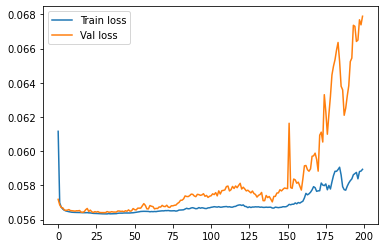

In [27]:
#%% evaluation
print(hist.history.keys())

plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")

plt.legend()
plt.show()

In [29]:
x_test_encoded = autoencoder.predict(x_test)


5867/5867 [==============================] - 3s 488us/step


In [30]:
x_train_encoded = autoencoder.predict(x_train)

13689/13689 [==============================] - 8s 563us/step


In [31]:
x_test.shape

(187735, 81)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(x_train_encoded, y_train)

B:\anaconda\envs\datai\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
pred_lr = lr.predict(x_test_encoded)

In [35]:
print(pred_lr)


['Anomaly' 'Anomaly' 'Anomaly' ... 'Anomaly' 'Anomaly' 'Anomaly']


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

[[173328   2412]
 [  7348   4647]]
              precision    recall  f1-score   support

     Anomaly       0.96      0.99      0.97    175740
      Normal       0.66      0.39      0.49     11995

    accuracy                           0.95    187735
   macro avg       0.81      0.69      0.73    187735
weighted avg       0.94      0.95      0.94    187735



<AxesSubplot:>

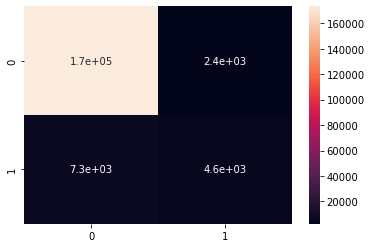

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True)

In [38]:
#method 2

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(64, input_shape=(81,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
y_train = np.array([0 if each == "Normal" else 1 for each in y_train])
y_test = np.array([0 if each == "Normal" else 1 for each in y_test])

history = model.fit(x_train_encoded, y_train, verbose=0, epochs=50)



pred_ann = model.predict(x_test_encoded)

pred_ann = np.where(pred_ann > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_ann))
print(classification_report(y_test, pred_ann))

5867/5867 [==============================] - 3s 548us/step
[[ 11690    305]
 [    99 175641]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11995
           1       1.00      1.00      1.00    175740

    accuracy                           1.00    187735
   macro avg       0.99      0.99      0.99    187735
weighted avg       1.00      1.00      1.00    187735



<AxesSubplot:>

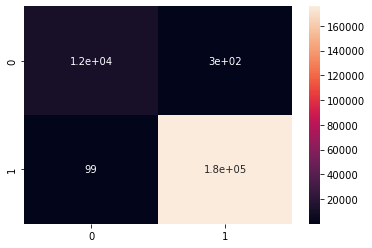

In [39]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_ann), annot=True)
